### Importação dos dados



In [2]:
import pandas as pd
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import geobr



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['loja_id'] = 'loja_1'
loja2['loja_id'] = 'loja_2'
loja3['loja_id'] = 'loja_3'
loja4['loja_id'] = 'loja_4'

dados = pd.concat([loja, loja2, loja3, loja4])


#1. Análise do faturamento


In [3]:
valor_total_vendas = dados.groupby('loja_id')['Preço'].sum()
print(f"Valor total de vendas: R$ {valor_total_vendas}")


Valor total de vendas: R$ loja_id
loja_1    1534509.12
loja_2    1488459.06
loja_3    1464025.03
loja_4    1384497.58
Name: Preço, dtype: float64


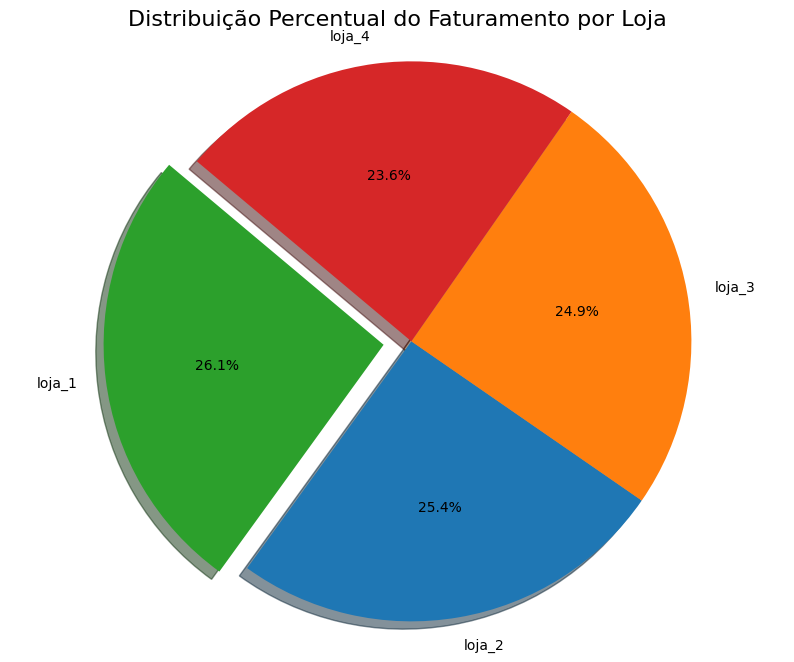

In [18]:
faturamento_por_loja = dados.groupby('loja_id')['Preço'].sum()

plt.figure(figsize=(10, 8))

# Define as cores (opcional, para manter consistência com o gráfico de barras)
cores = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']

# Lógica para "explodir" (destacar) a maior fatia
explode = [0] * len(faturamento_por_loja)  # Cria uma lista de zeros
indice_maior_fatia = faturamento_por_loja.idxmax() # Encontra o nome da loja com maior faturamento
posicao_maior_fatia = faturamento_por_loja.index.get_loc(indice_maior_fatia) # Encontra a posição numérica
explode[posicao_maior_fatia] = 0.1  # Define o destaque para a maior fatia

# Cria o gráfico de pizza
plt.pie(
    faturamento_por_loja,
    labels=faturamento_por_loja.index,
    autopct='%1.1f%%',  # Formato para exibir a porcentagem com uma casa decimal
    startangle=140,     # Ângulo inicial para melhor visualização
    colors=cores,
    explode=explode,    # Aplica o destaque na maior fatia
    shadow=True         # Adiciona uma sombra para um efeito 3D sutil
)

# Adiciona um título ao gráfico
plt.title('Distribuição Percentual do Faturamento por Loja', fontsize=16)

# Garante que o gráfico seja um círculo perfeito
plt.axis('equal')
plt.show()

# 2. Vendas por Categoria


In [28]:
cat = loja['Categoria do Produto'].value_counts()
print("\n--- Lista de Categorias ---")

print(cat)


--- Lista de Categorias ---
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


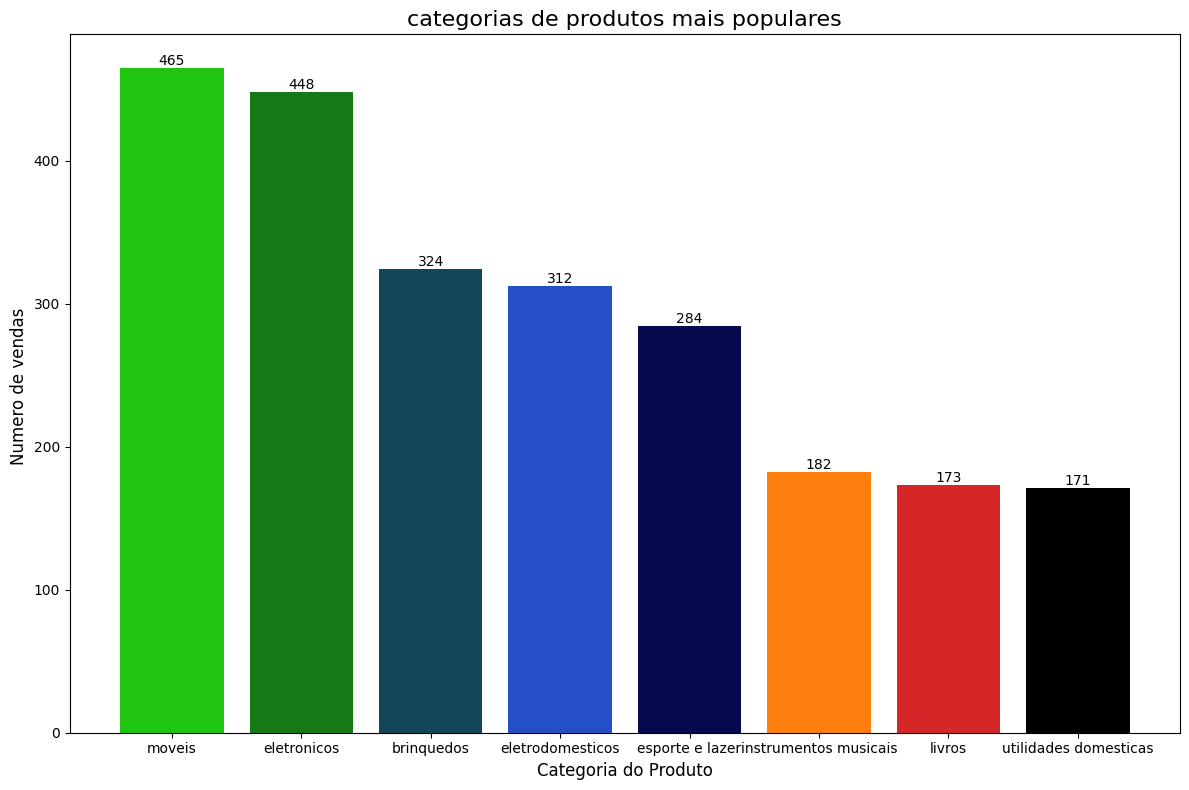

In [29]:
mais_populares = loja['Categoria do Produto'].value_counts()


plt.figure(figsize=(12, 8))

barras = plt.bar(mais_populares.index, mais_populares.values, color=["#1fc510", "#157915", "#14465A", "#244FC7", "#060A4D", "#ff7f0e", "#d62728", "#000000"])

# --- titulos para melhor vizualização
plt.title('categorias de produtos mais populares', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Numero de vendas ', fontsize=12)
plt.xticks(rotation=0) # --- Mantém os nomes das lojas na horizontal


# --- Adiciona os rótulos de valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, yval, f'{yval:.0f}', va='bottom', ha='center')


# Otimiza o layout para que nada fique cortado
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [30]:
cat = loja2['Categoria do Produto'].value_counts()
print("\n--- Lista de Categorias ---")

print(cat)


--- Lista de Categorias ---
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


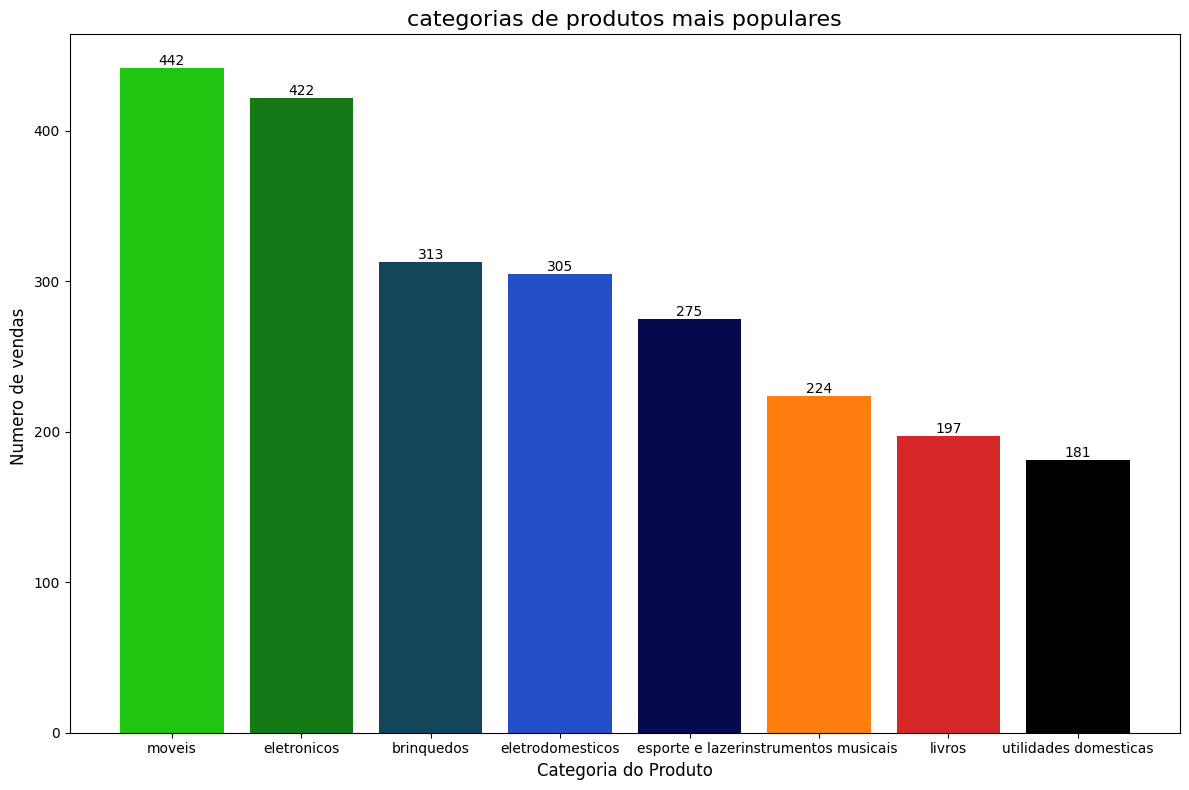

In [31]:
mais_populares = loja2['Categoria do Produto'].value_counts()


plt.figure(figsize=(12, 8))

barras = plt.bar(mais_populares.index, mais_populares.values, color=["#1fc510", "#157915", "#14465A", "#244FC7", "#060A4D", "#ff7f0e", "#d62728", "#000000"])

# --- titulos para melhor vizualização
plt.title('categorias de produtos mais populares', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Numero de vendas ', fontsize=12)
plt.xticks(rotation=0) # --- Mantém os nomes das lojas na horizontal


# --- Adiciona os rótulos de valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, yval, f'{yval:.0f}', va='bottom', ha='center')


# Otimiza o layout para que nada fique cortado
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [32]:
cat = loja3['Categoria do Produto'].value_counts()
print("\n--- Lista de Categorias ---")

print(cat)


--- Lista de Categorias ---
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64


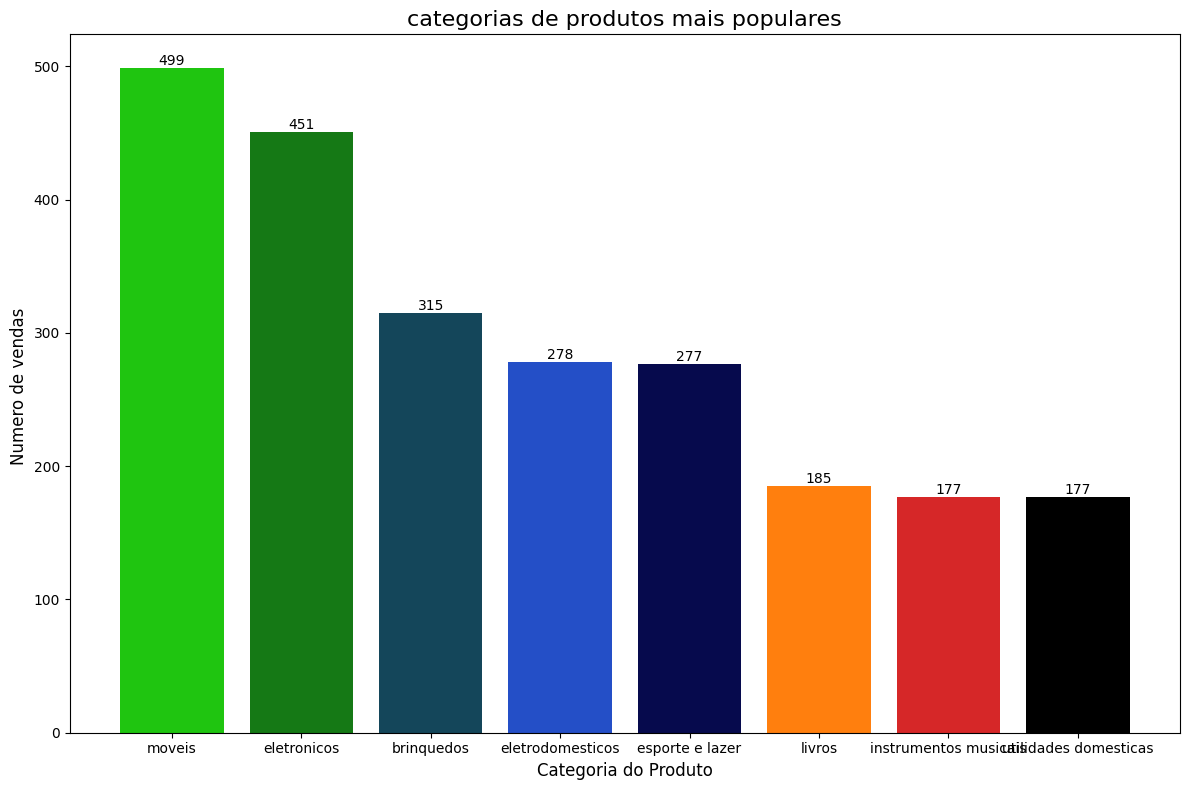

In [33]:
mais_populares = loja3['Categoria do Produto'].value_counts()


plt.figure(figsize=(12, 8))

barras = plt.bar(mais_populares.index, mais_populares.values, color=["#1fc510", "#157915", "#14465A", "#244FC7", "#060A4D", "#ff7f0e", "#d62728", "#000000"])

# --- titulos para melhor vizualização
plt.title('categorias de produtos mais populares', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Numero de vendas ', fontsize=12)
plt.xticks(rotation=0) # --- Mantém os nomes das lojas na horizontal


# --- Adiciona os rótulos de valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, yval, f'{yval:.0f}', va='bottom', ha='center')


# Otimiza o layout para que nada fique cortado
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [34]:
cat = loja4['Categoria do Produto'].value_counts()
print("\n--- Lista de Categorias ---")

print(cat)


--- Lista de Categorias ---
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64


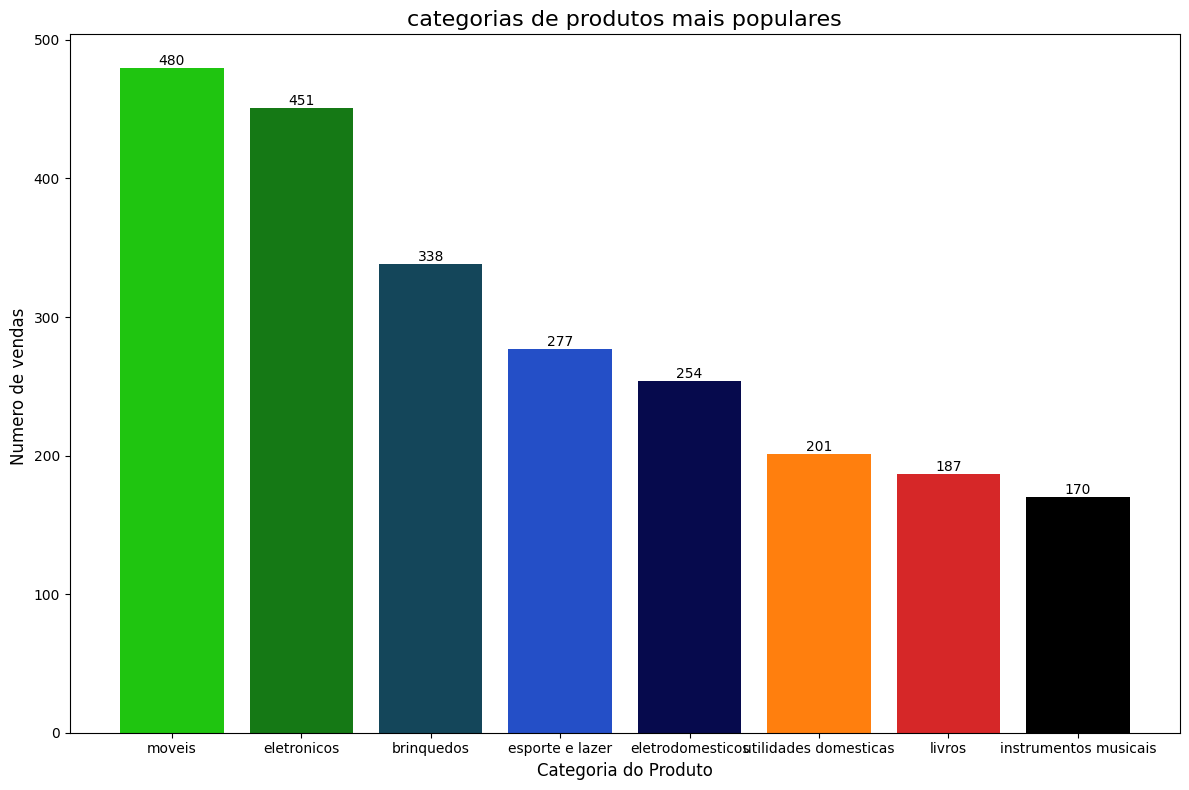

In [35]:
mais_populares = loja4['Categoria do Produto'].value_counts()


plt.figure(figsize=(12, 8))

barras = plt.bar(mais_populares.index, mais_populares.values, color=["#1fc510", "#157915", "#14465A", "#244FC7", "#060A4D", "#ff7f0e", "#d62728", "#000000"])

# --- titulos para melhor vizualização
plt.title('categorias de produtos mais populares', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Numero de vendas ', fontsize=12)
plt.xticks(rotation=0) # --- Mantém os nomes das lojas na horizontal


# --- Adiciona os rótulos de valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, yval, f'{yval:.0f}', va='bottom', ha='center')


# Otimiza o layout para que nada fique cortado
plt.tight_layout()

# Exibe o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

In [9]:
media = dados.groupby('loja_id')['Avaliação da compra'].mean()
print("\n--- media de avalização de compras ---")
print(media.round(2))


--- media de avalização de compras ---
loja_id
loja_1    3.98
loja_2    4.04
loja_3    4.05
loja_4    4.00
Name: Avaliação da compra, dtype: float64


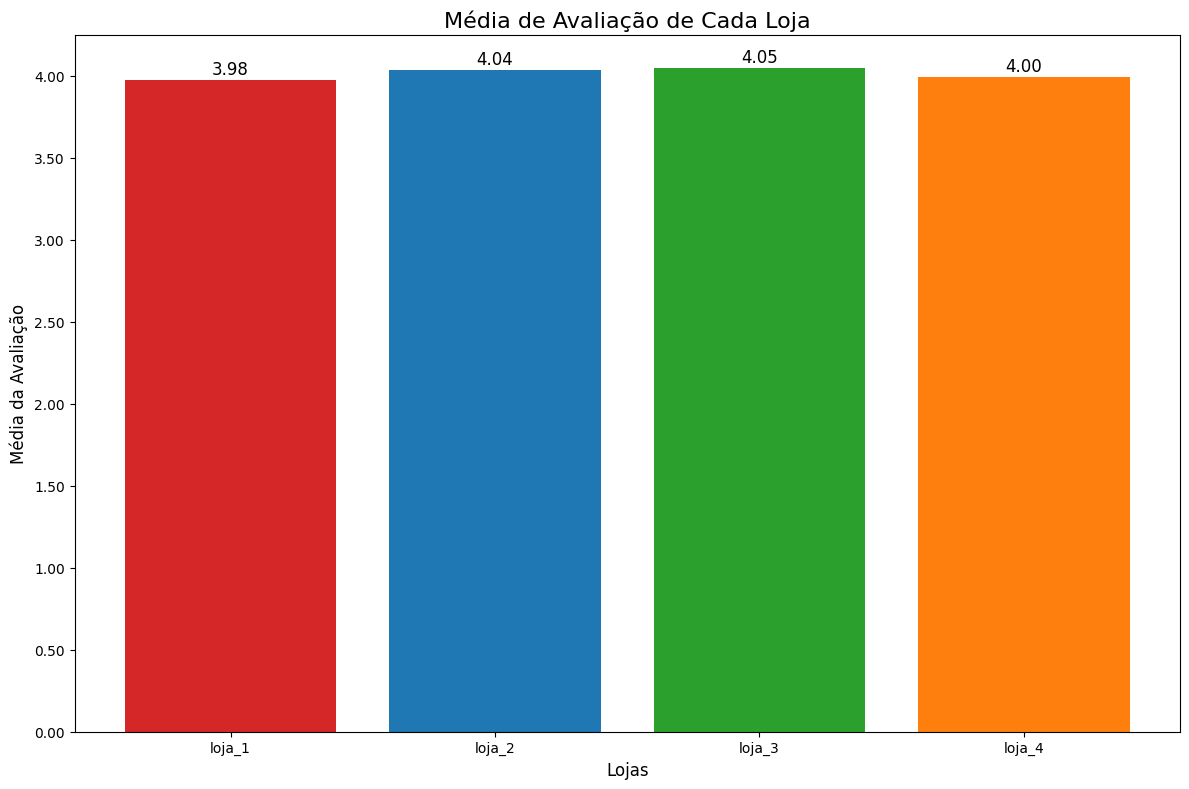

In [10]:
media_avaliacao = dados.groupby('loja_id')['Avaliação da compra'].mean()

plt.figure(figsize=(12, 8))
barras = plt.bar(media_avaliacao.index, media_avaliacao.values, color=['#d62728', '#1f77b4', '#2ca02c', '#ff7f0e'])

# --- Títulos
plt.title('Média de Avaliação de Cada Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média da Avaliação', fontsize=12)
plt.xticks(rotation=0)

# --- Função para exibir no eixo y o valor com números decimais
def decimal_formatter(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(decimal_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# --- Laço for para adicionar o valor com duas casas decimais em cima de cada barra, com sua respectiva loja
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0, yval + 0.01, f'{yval:.2f}', va='bottom', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [21]:
prod = loja['Produto'].value_counts()
print("\n--- Vendas de cada produto ---")
print(prod)




--- Vendas de cada produto ---
Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama kin

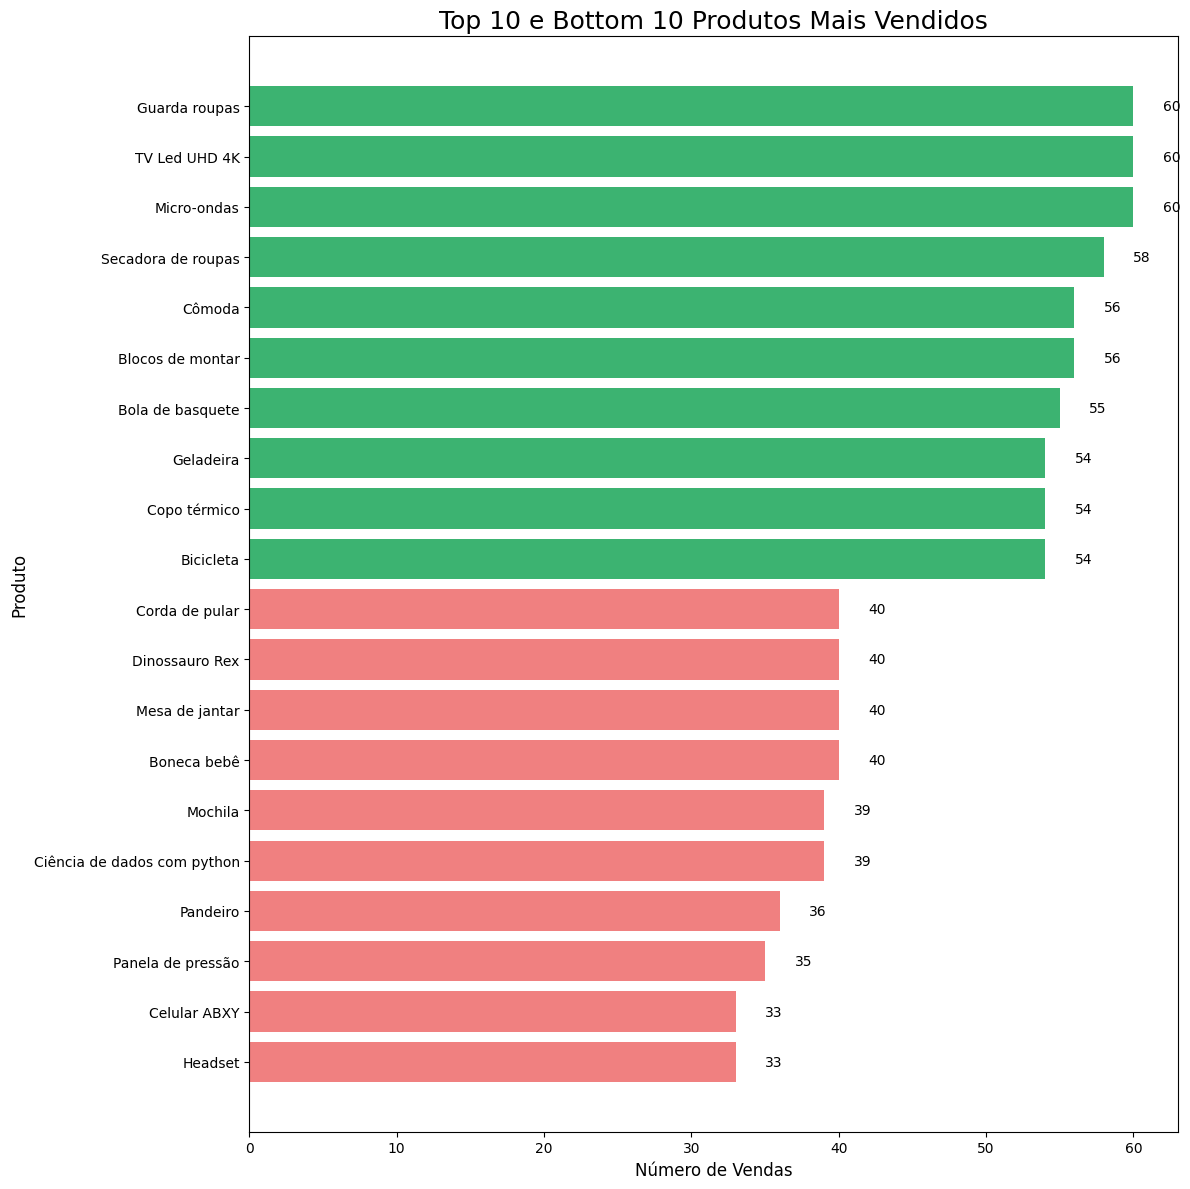

In [20]:
MaiseMenosVendidos = loja['Produto'].value_counts()
N = 10 # Número de produtos a serem mostrados em cada extremo

# --- Ordena os dados
MaiseMenosVendidos = MaiseMenosVendidos.sort_values(ascending=False)

# --- Seleciona o top N e o Botton N
top_N = MaiseMenosVendidos.head(N)
bottom_N = MaiseMenosVendidos.tail(N)

# --- Concatena os dois para plotar no mesmo gráfico
dados_extremos = pd.concat([top_N, bottom_N])
dados_extremos = dados_extremos.sort_values(ascending=True)

# --- Criação do Gráfico ---
plt.figure(figsize=(12, 12))
cores = ['lightcoral'] * N + ['mediumseagreen'] * N
barras = plt.barh(dados_extremos.index, dados_extremos.values, color=cores)

# Títulos e rótulos
plt.title(f'Top {N} e Bottom {N} Produtos Mais Vendidos', fontsize=18)
plt.xlabel('Número de Vendas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adicionar o número de vendas no final de cada barra
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 2,
             barra.get_y() + barra.get_height() / 2,
             f'{int(largura)}',
             ha='left',
             va='center')

# Ajusta a margem esquerda para garantir que os nomes dos produtos não sejam cortados
plt.subplots_adjust(left=0.1)

# O tight_layout ainda é útil para ajustar o resto
plt.tight_layout(rect=[0, 0, 1, 1]) # O rect ajuda a tight_layout a respeitar o subplots_adjust

plt.show()

In [22]:
prod = loja2['Produto'].value_counts()
print("\n--- Vendas de cada produto ---")
print(prod)


--- Vendas de cada produto ---
Produto
Iniciando em programação       65
Micro-ondas                    62
Bateria                        61
Violão                         58
Pandeiro                       58
Secadora de roupas             57
Celular Plus X42               55
Blocos de montar               54
Guarda roupas                  54
Jogo de panelas                52
Corda de pular                 50
Lavadora de roupas             49
Cadeira de escritório          49
Geladeira                      49
Boneca bebê                    48
Carrinho controle remoto       47
Guitarra                       47
Cama box                       47
Copo térmico                   47
Modelagem preditiva            46
Bola de vôlei                  46
Jogo de copos                  46
Lava louças                    46
Kit banquetas                  45
Cama king                      45
Bicicleta                      45
Mochila                        45
Cubo mágico 8x8                45
Xadrez d

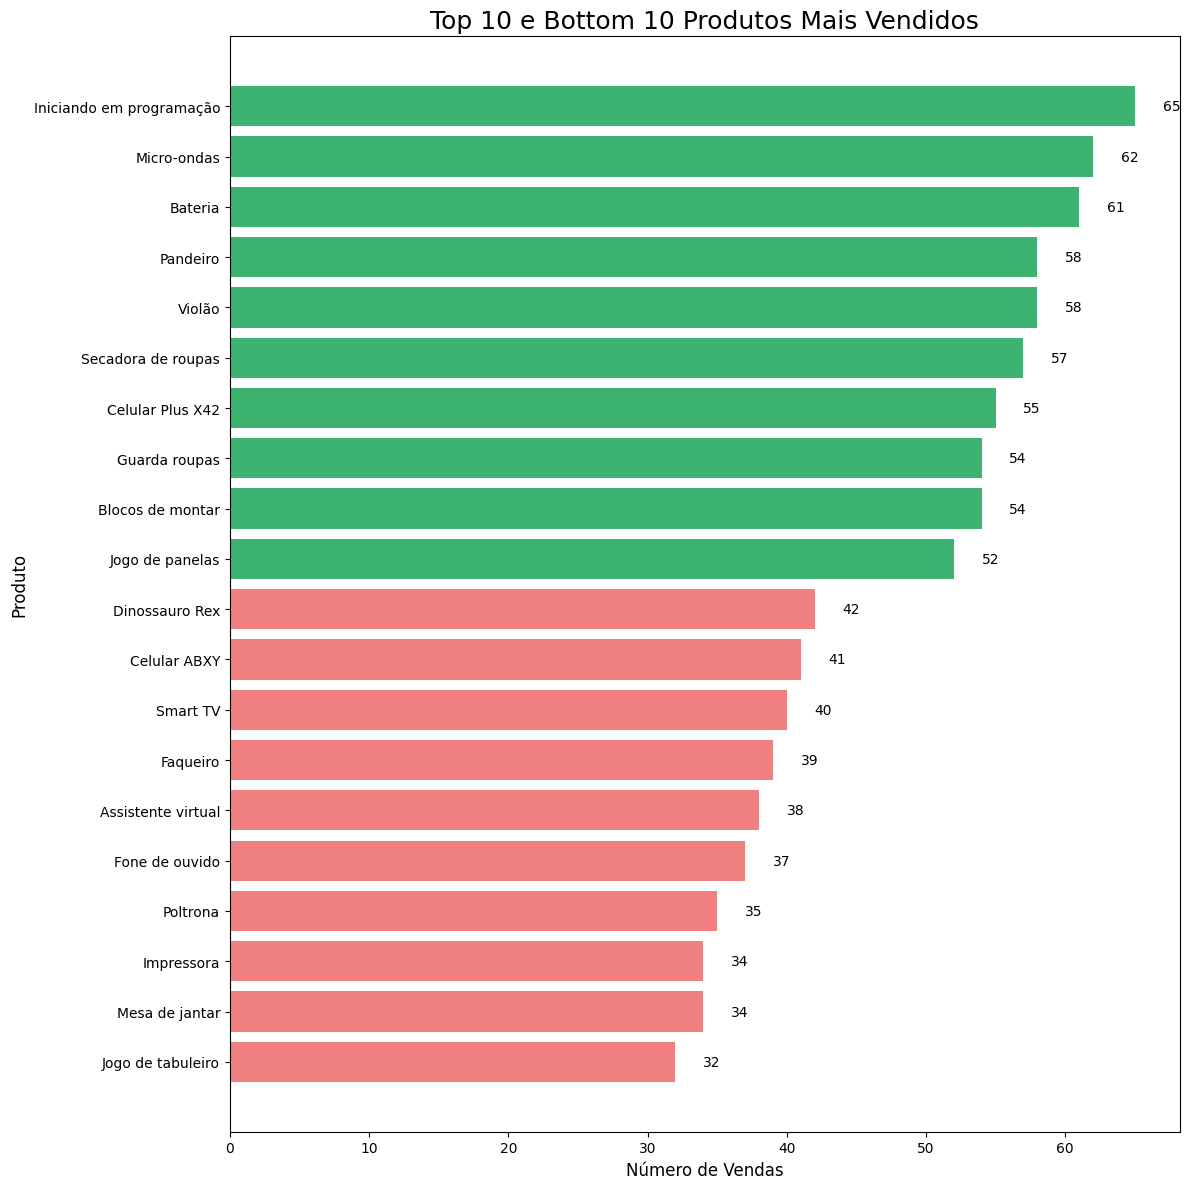

In [23]:
MaiseMenosVendidos = loja2['Produto'].value_counts()
N = 10 # Número de produtos a serem mostrados em cada extremo

# --- Ordena os dados
MaiseMenosVendidos = MaiseMenosVendidos.sort_values(ascending=False)

# --- Seleciona o top N e o Botton N
top_N = MaiseMenosVendidos.head(N)
bottom_N = MaiseMenosVendidos.tail(N)

# --- Concatena os dois para plotar no mesmo gráfico
dados_extremos = pd.concat([top_N, bottom_N])
dados_extremos = dados_extremos.sort_values(ascending=True)

# --- Criação do Gráfico ---
plt.figure(figsize=(12, 12))
cores = ['lightcoral'] * N + ['mediumseagreen'] * N
barras = plt.barh(dados_extremos.index, dados_extremos.values, color=cores)

# Títulos e rótulos
plt.title(f'Top {N} e Bottom {N} Produtos Mais Vendidos', fontsize=18)
plt.xlabel('Número de Vendas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adicionar o número de vendas no final de cada barra
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 2,
             barra.get_y() + barra.get_height() / 2,
             f'{int(largura)}',
             ha='left',
             va='center')

# Ajusta a margem esquerda para garantir que os nomes dos produtos não sejam cortados
plt.subplots_adjust(left=0.1)

# O tight_layout ainda é útil para ajustar o resto
plt.tight_layout(rect=[0, 0, 1, 1]) # O rect ajuda a tight_layout a respeitar o subplots_adjust

plt.show()

In [24]:
prod = loja3['Produto'].value_counts()
print("\n--- Vendas de cada produto ---")
print(prod)


--- Vendas de cada produto ---
Produto
Kit banquetas                  57
Mesa de jantar                 56
Cama king                      56
Jogo de panelas                55
Cômoda                         55
Smart TV                       54
Fogão                          53
Corda de pular                 53
Modelagem preditiva            53
Carrinho controle remoto       52
Lava louças                    52
Bicicleta                      52
Jogo de tabuleiro              52
Pandeiro                       51
Impressora                     50
Geladeira                      50
Bola de basquete               50
Guarda roupas                  49
Bola de vôlei                  48
Tablet ABXY                    48
Poltrona                       47
Violão                         47
Panela de pressão              47
Xadrez de madeira              47
Ciência de dados com python    46
Celular Plus X42               46
Dinossauro Rex                 46
Cadeira de escritório          46
Smartwat

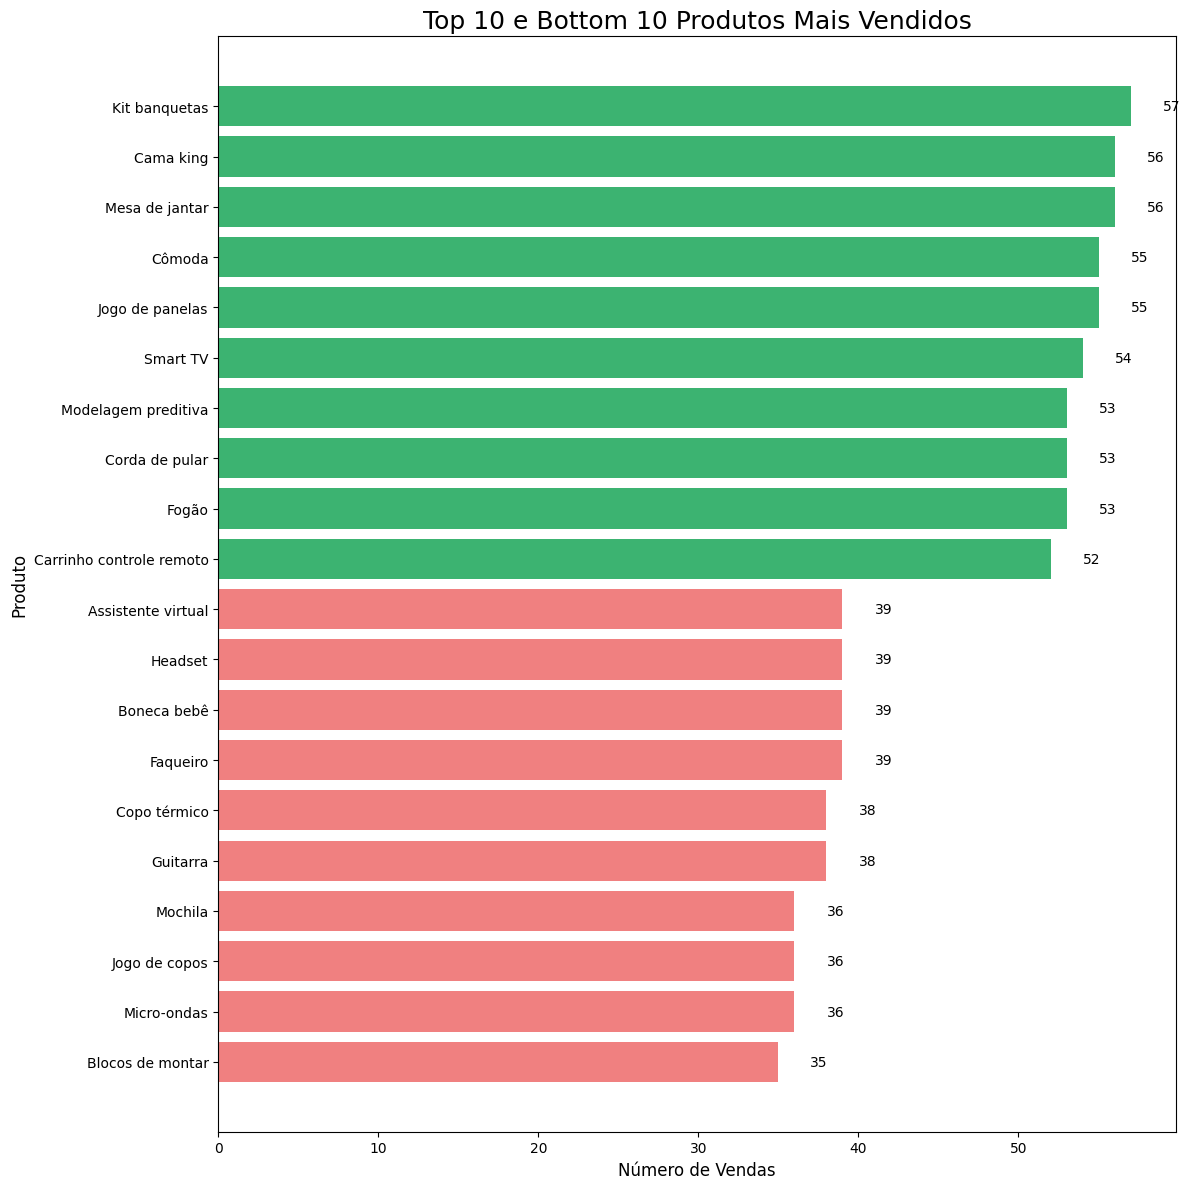

In [25]:
MaiseMenosVendidos = loja3['Produto'].value_counts()
N = 10 # Número de produtos a serem mostrados em cada extremo

# --- Ordena os dados
MaiseMenosVendidos = MaiseMenosVendidos.sort_values(ascending=False)

# --- Seleciona o top N e o Botton N
top_N = MaiseMenosVendidos.head(N)
bottom_N = MaiseMenosVendidos.tail(N)

# --- Concatena os dois para plotar no mesmo gráfico
dados_extremos = pd.concat([top_N, bottom_N])
dados_extremos = dados_extremos.sort_values(ascending=True)

# --- Criação do Gráfico ---
plt.figure(figsize=(12, 12))
cores = ['lightcoral'] * N + ['mediumseagreen'] * N
barras = plt.barh(dados_extremos.index, dados_extremos.values, color=cores)

# Títulos e rótulos
plt.title(f'Top {N} e Bottom {N} Produtos Mais Vendidos', fontsize=18)
plt.xlabel('Número de Vendas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adicionar o número de vendas no final de cada barra
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 2,
             barra.get_y() + barra.get_height() / 2,
             f'{int(largura)}',
             ha='left',
             va='center')

# Ajusta a margem esquerda para garantir que os nomes dos produtos não sejam cortados
plt.subplots_adjust(left=0.1)

# O tight_layout ainda é útil para ajustar o resto
plt.tight_layout(rect=[0, 0, 1, 1]) # O rect ajuda a tight_layout a respeitar o subplots_adjust

plt.show()

In [26]:
prod = loja4['Produto'].value_counts()
print("\n--- Vendas de cada produto ---")
print(prod)


--- Vendas de cada produto ---
Produto
Cama box                       62
Faqueiro                       59
Dashboards com Power BI        56
Cama king                      56
Carrinho controle remoto       55
Mesa de jantar                 55
Cômoda                         55
Smart TV                       54
Blocos de montar               54
Pandeiro                       52
Impressora                     50
Modelagem preditiva            50
Assistente virtual             50
Jogo de panelas                50
Bola de basquete               50
Copo térmico                   48
Celular Plus X42               48
Boneca bebê                    48
Bateria                        48
Bola de vôlei                  48
Jogo de tabuleiro              48
Micro-ondas                    48
Fogão                          47
Cubo mágico 8x8                47
Sofá retrátil                  47
Dinossauro Rex                 47
Panela de pressão              46
Jogo de copos                  46
Tablet A

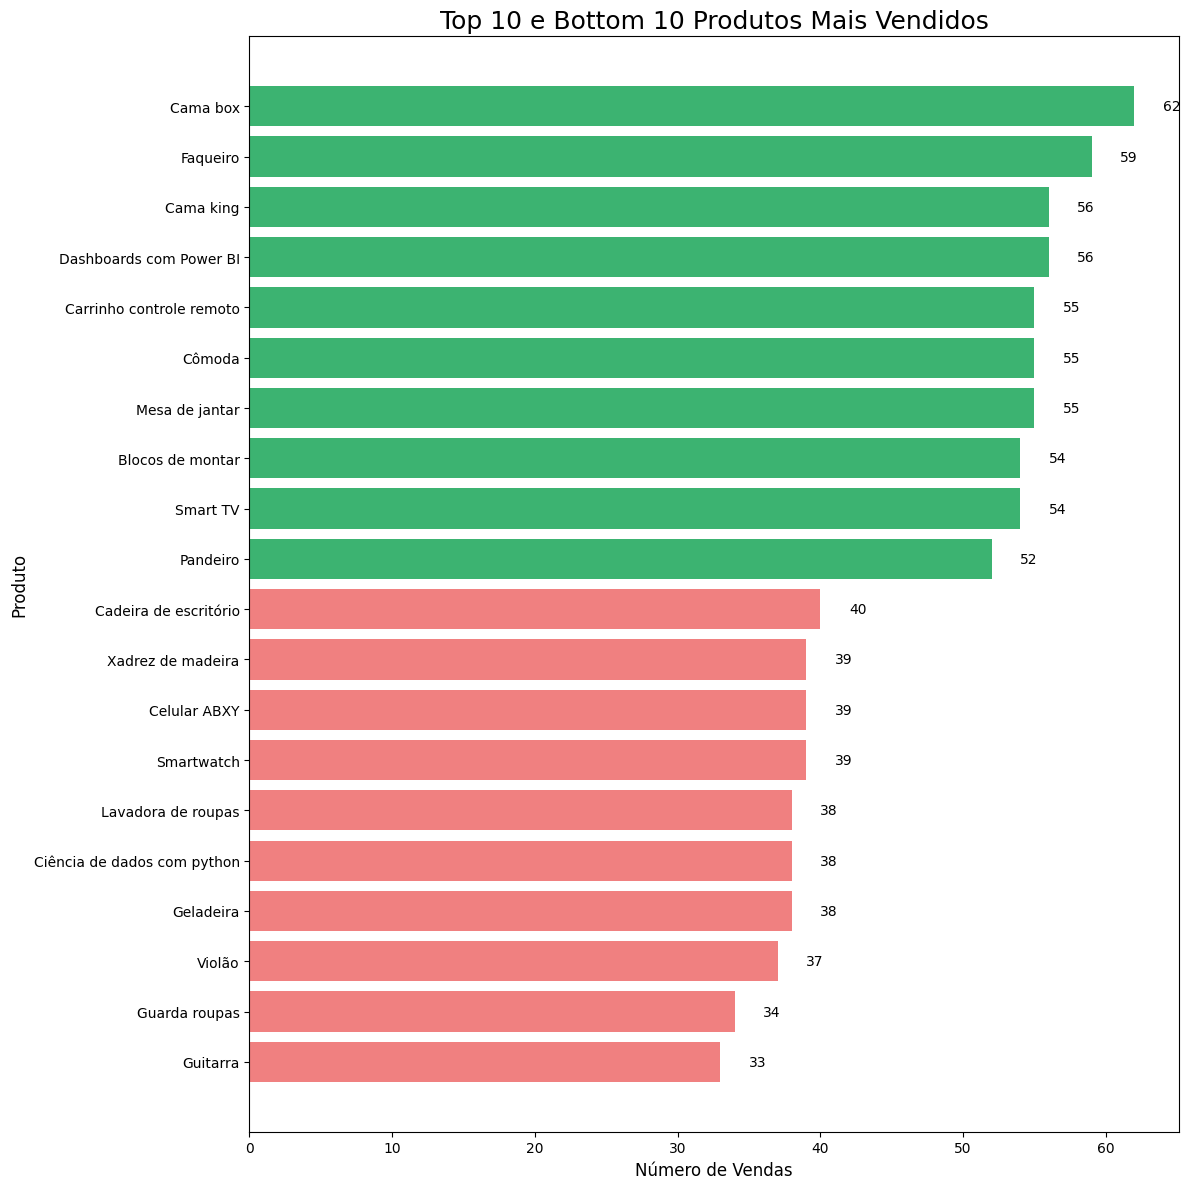

In [27]:
MaiseMenosVendidos = loja4['Produto'].value_counts()
N = 10 # Número de produtos a serem mostrados em cada extremo

# --- Ordena os dados
MaiseMenosVendidos = MaiseMenosVendidos.sort_values(ascending=False)

# --- Seleciona o top N e o Botton N
top_N = MaiseMenosVendidos.head(N)
bottom_N = MaiseMenosVendidos.tail(N)

# --- Concatena os dois para plotar no mesmo gráfico
dados_extremos = pd.concat([top_N, bottom_N])
dados_extremos = dados_extremos.sort_values(ascending=True)

# --- Criação do Gráfico ---
plt.figure(figsize=(12, 12))
cores = ['lightcoral'] * N + ['mediumseagreen'] * N
barras = plt.barh(dados_extremos.index, dados_extremos.values, color=cores)

# Títulos e rótulos
plt.title(f'Top {N} e Bottom {N} Produtos Mais Vendidos', fontsize=18)
plt.xlabel('Número de Vendas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adicionar o número de vendas no final de cada barra
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 2,
             barra.get_y() + barra.get_height() / 2,
             f'{int(largura)}',
             ha='left',
             va='center')

# Ajusta a margem esquerda para garantir que os nomes dos produtos não sejam cortados
plt.subplots_adjust(left=0.1)

# O tight_layout ainda é útil para ajustar o resto
plt.tight_layout(rect=[0, 0, 1, 1]) # O rect ajuda a tight_layout a respeitar o subplots_adjust

plt.show()

# 5. Frete Médio por Loja


In [14]:
frete = dados.groupby('loja_id')['Frete'].mean()
print("\n--- media de fretes ---")
print(frete) #media do frete


--- media de fretes ---
loja_id
loja_1    34.691805
loja_2    33.621941
loja_3    33.074464
loja_4    31.278997
Name: Frete, dtype: float64


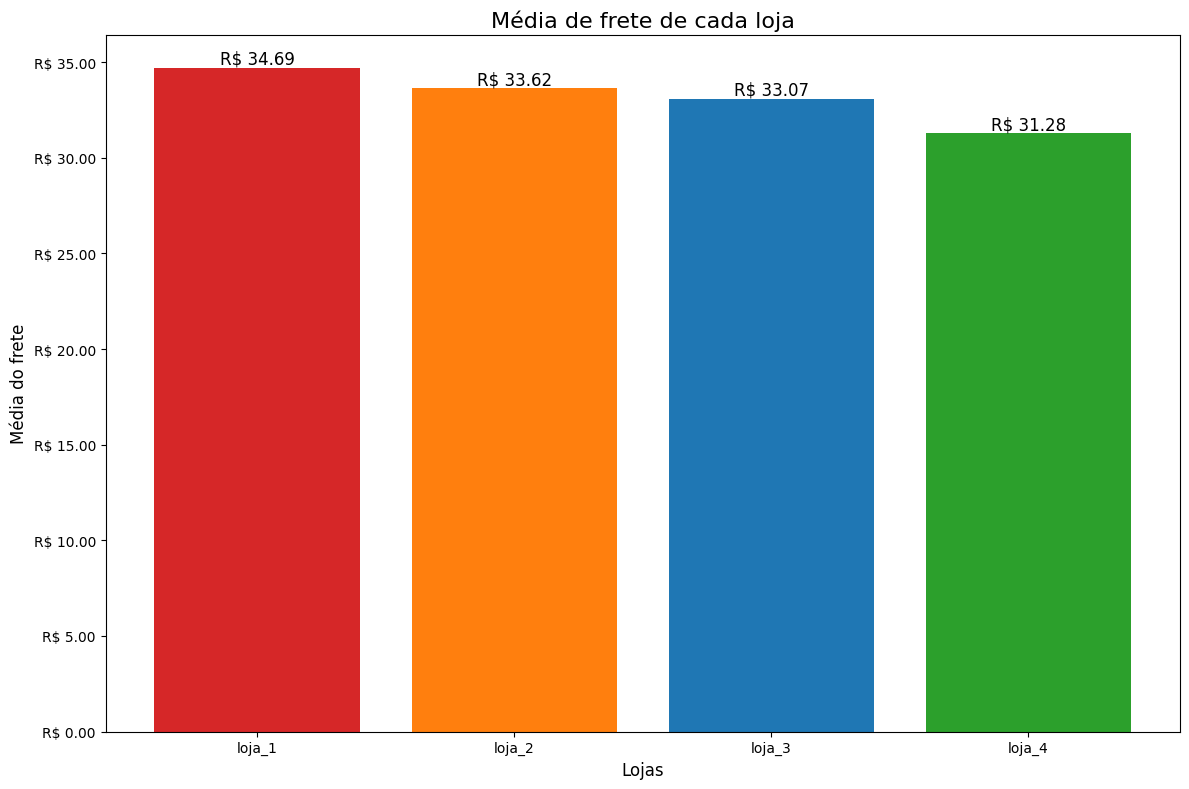

In [15]:
media_avaliacao = dados.groupby('loja_id')['Frete'].mean()

plt.figure(figsize=(12, 8))
barras = plt.bar(media_avaliacao.index, media_avaliacao.values, color=['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c' ])

# --- Títulos
plt.title('Média de frete de cada loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média do frete', fontsize=12)
plt.xticks(rotation=0)

def decimal_formatter(x, pos): # --- Função para organizar os textos do eixo y
    return f'R$ {x:.2f}'
formatter = FuncFormatter(decimal_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# --- Para adicionar o respectivo valor de cada loja e adicionar 2 casas decimais
for barra in barras:
    yval = barra.get_height()

    plt.text(barra.get_x() + barra.get_width()/2.0, yval + 0.01, f'R$ {yval:.2f}', va='bottom', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 6. Desafio extra


Esta atividade é um extra, logo é OPCIONAL.

neste extra, você será desafiado a explorar as coordenadas geográficas dos dados de venda e identificar padrões relacionados à localização das compras. Utilizando as colunas de latitude e longitude, você pode gerar visualizações para entender como as vendas variam de acordo com a localização geográfica.

Desafio: Utilize os dados de latitude (lat) e longitude (lon) para mapear as vendas de cada loja e analisar a distribuição geográfica dos produtos vendidos.

Gere gráficos de dispersão ou mapas de calor (Heatmaps) para visualizar os dados e identificar áreas com maior concentração de vendas.

Explore se algumas lojas têm um desempenho superior ou inferior em determinadas regiões, e identifique se existem padrões geográficos que possam influenciar o desempenho das lojas.

Malha de estados do Brasil carregada com sucesso via geobr!


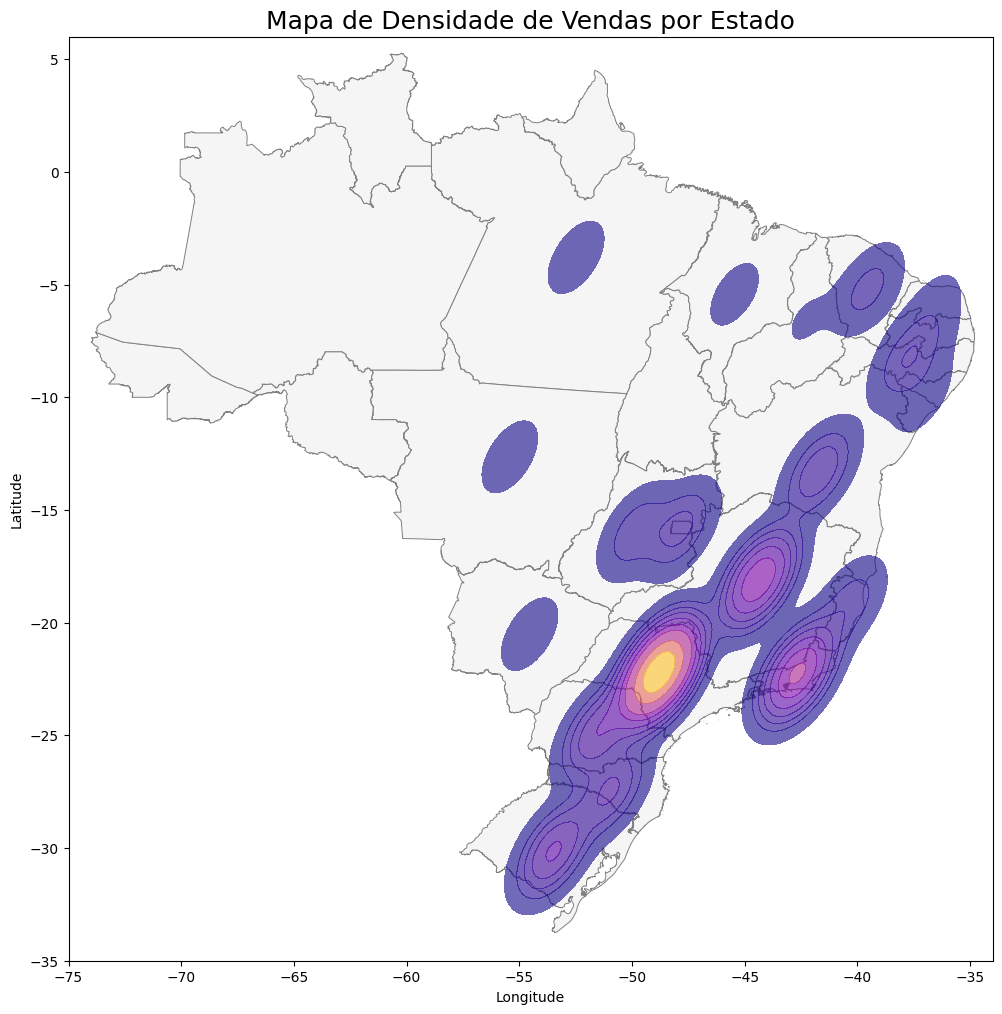

In [4]:
#  --- Carregar o mapa-múndi a partir do arquivo local .shp
try:
    estados_br = geobr.read_state(year=2020)
    print("Malha de estados do Brasil carregada com sucesso via geobr!")
except Exception as e:
    print(f"Não foi possível baixar os dados dos estados: {e}")
    print("Verifique sua conexão com a internet.")
    exit()

# --- Criar a figura e os eixos do gráfico (nosso "quadro" em branco)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# --- CAMADA 1: Desenhando o mapa dos estados no fundo ---
estados_br.plot(
    ax=ax,
    color='whitesmoke', # Cor de preenchimento dos estados
    edgecolor='gray',   # Cor das linhas das divisas
    linewidth=0.7       # Espessura das linhas das divisas
)

# --- CAMADA 2: Desenhando o mapa de densidade (calor) por cima ---
sns.kdeplot(
    data=dados,
    x='lon',
    y='lat',
    ax=ax,              # Garante que o calor seja desenhado no mesmo quadro do mapa
    fill=True,
    thresh=0.05,
    alpha=0.6,          # Usamos transparência para ver as divisas por baixo
    cmap="plasma"
)

# 3. Ajustar os limites do mapa para um bom enquadramento
#    (não é estritamente necessário, pois o plot dos estados já ajusta, mas é uma boa prática)
ax.set_xlim(-75, -34)
ax.set_ylim(-35, 6)

# 4. Títulos e rótulos
ax.set_title('Mapa de Densidade de Vendas por Estado', fontsize=18)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal') # Garante que a proporção do mapa não fique distorcida

plt.show()

# Conclusão

# Loja 1: A Gigante dos "Produtos Grandes e Problemáticos"
**Faturamento**: O mais alto.<br>
**Avaliação**: A mais baixa.<br>
**Frete**: O mais caro.<br>
**Categorias Populares**: Móveis (465 vendas) e Eletrônicos (448 vendas).
Produtos Mais Vendidos: TV led UHD 4K, Guarda Roupas, Secadora de roupas.

**Diagnóstico**: Agora temos a resposta! O frete da Loja 1 é o mais caro porque seu foco de vendas são produtos grandes, pesados e de entrega complexa. A baixa avaliação dos clientes provavelmente está ligada a isso: problemas na entrega de móveis e eletrônicos grandes são muito comuns (avarias, atrasos, montagem). A Loja 1 vende muito, mas vende produtos que são inerentemente caros de transportar e que geram muita dor de cabeça para o cliente.

---

# Loja 3: A Especialista em "Casa e Conforto" com Qualidade
**Faturamento**: Médio/Alto.<br>
**Avaliação**: A mais alta.<br>
**Frete**: Médio.<br>
**Categorias Populares**: É a campeã absoluta em Móveis (499 vendas).
Produtos Mais Vendidos: kit banquetas, cama king, mesa de jantar.

**Diagnóstico** : A Loja 3 é a sua "estrela silenciosa". Ela também vende produtos grandes e complexos (móveis), mas, ao contrário da Loja 1, ela o faz com excelência, resultando na maior satisfação do cliente. Isso indica que a Loja 3 provavelmente tem uma operação logística e de atendimento muito mais eficiente. Ela é o seu modelo de como vender móveis corretamente.

---

# Loja 4: A Pequena Generalista e de Baixo Custo
**Faturamento**: O mais baixo.<br>
**Avaliação**: Média.<br>
**Frete**: O mais barato.<br>
**Categorias Populares**: Também forte em Móveis (480 vendas) e com bom desempenho em Utilidades Domésticas.
Produtos Mais Vendidos: cama box, faqueiro.

**Diagnóstico**: A Loja 4 tem um desempenho decente em categorias importantes, mas seu volume geral é baixo. O frete barato é sua grande vantagem, indicando uma possível eficiência operacional ou um foco em uma região geograficamente mais concentrada. Ela não é problemática, mas também não se destaca em volume.

---

# Loja 2: A Intermediária Estável
**Faturamento**: Médio.<br>
**Avaliação**: Média.<br>
**Frete**: Médio.<br>
**Categorias Populares**: Perfil balanceado, mas se destaca em Instrumentos Musicais (224 vendas), sendo a melhor nesta categoria.
Produtos Mais Vendidos: Uma mistura de livros, eletrodomésticos e instrumentos.

**Diagnóstico**: A Loja 2 é uma generalista. Não lidera nas categorias principais, mas tem um nicho forte (instrumentos musicais) e um desempenho geral estável, sem grandes problemas.

---

# Cénario 1 - eliminação Loja 1 -
Neste cénario consideramos que o custo do frete quem paga é a loja, logo, a loja 1 embora tenha o maior lucro também tem o maior frete, muito por conta de seus produtos serem mais caros o transporte, e sua media de avaliação é a menor. Logo especulamos que, a loja 1 gera um maior gasto para se manter funcionando, além de poder sujar a reputação das outras lojas por conta de suas baixas avaliações.
Logo neste cénario a loja a ser vendida pelo seu João seria a **loja 1** , e o dinherio adquirido pode ser investido para o melhor funcionamento das outras 3 loajs.

---

# Cénario 2 - eliminação loja 4 -
Neste cénario consideramos que o frete é pago pelo cliente, então com esta informação decidimos eliminar a **loja 4**. Já que a loja 4 apresenta menor lucro para o sr.João, e o dinheiro pode ser investido para melhorar a logistica da loja 1, assim tornando ela a lider de vendas e media em comparação as outras lojas.

---